<a href="https://colab.research.google.com/github/Saint-Fiston/interactive-visualization-project/blob/main/OSI_TCPIP_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipywidgets


In [ ]:
# Run this cell first
!pip install ipywidgets --quiet
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time


In [ ]:
# Define OSI and TCP/IP layers
osi_layers = [
    "Application",
    "Presentation",
    "Session",
    "Transport",
    "Network",
    "Data Link",
    "Physical"
]

tcpip_layers = [
    "Application",
    "Transport",
    "Internet",
    "Network Access"
]

osi_to_tcpip = {
    "Application": "Application",
    "Presentation": "Application",
    "Session": "Application",
    "Transport": "Transport",
    "Network": "Internet",
    "Data Link": "Network Access",
    "Physical": "Network Access"
}


In [ ]:
# Function to draw static layer diagrams
def draw_models():
    fig, ax = plt.subplots(figsize=(10, 6))

    # Draw OSI Layers
    for i, layer in enumerate(reversed(osi_layers)):
        ax.add_patch(patches.Rectangle((0.5, i), 2.5, 1, edgecolor='black', facecolor='lightblue'))
        ax.text(1.75, i + 0.5, layer, ha='center', va='center', fontsize=10, fontweight='bold')

    # Draw TCP/IP Layers
    tcpip_y = [0, 1, 3, 6]
    tcpip_h = [1, 2, 3, 1]  # matching number of merged OSI layers
    for i, (layer, y, h) in enumerate(zip(reversed(tcpip_layers), tcpip_y, tcpip_h)):
        ax.add_patch(patches.Rectangle((4.5, y), 2.5, h, edgecolor='black', facecolor='lightgreen'))
        ax.text(5.75, y + h/2, layer, ha='center', va='center', fontsize=10, fontweight='bold')

    ax.set_xlim(0, 8)
    ax.set_ylim(0, 7)
    ax.axis('off')
    ax.set_title("OSI vs TCP/IP Model", fontsize=14, fontweight='bold')
    plt.show()


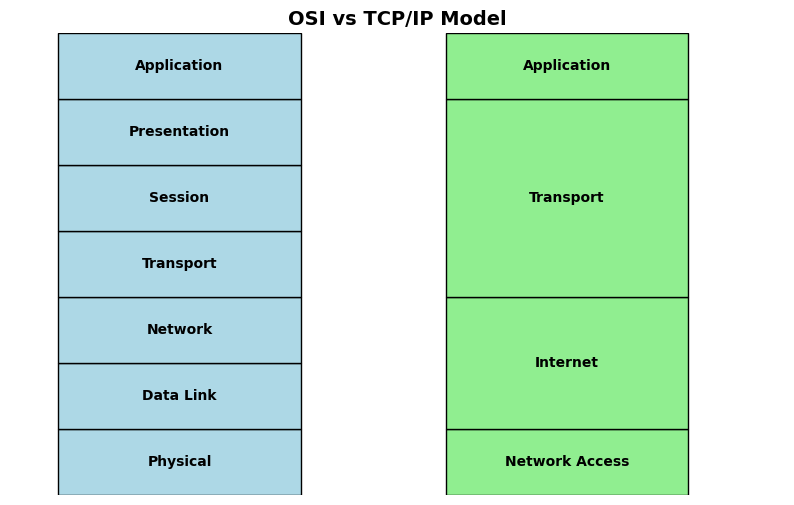

In [ ]:
# Display static diagram
draw_models()


In [ ]:
# Dropdown for interactive exploration
layer_dropdown = widgets.Dropdown(
    options=osi_layers,
    value='Application',
    description='Explore Layer:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

widgets.interact(explain_layer, layer=layer_dropdown);


interactive(children=(Dropdown(description='Explore Layer:', layout=Layout(width='50%'), options=('Application…

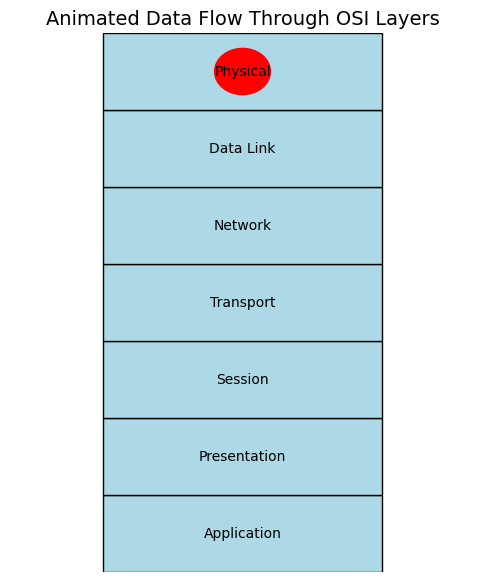

In [ ]:
# Animation: Show packet moving through OSI layers
def animate_data_flow():
    fig, ax = plt.subplots(figsize=(6, 7))

    for i in range(len(osi_layers)):
        ax.add_patch(patches.Rectangle((1, i), 3, 1, edgecolor='black', facecolor='lightblue'))
        ax.text(2.5, i + 0.5, osi_layers[i], ha='center', va='center')

    packet = plt.Circle((2.5, -0.5), 0.3, color='red')
    ax.add_patch(packet)

    ax.set_xlim(0, 5)
    ax.set_ylim(0, 7)
    ax.axis('off')
    ax.set_title("Animated Data Flow Through OSI Layers", fontsize=14)

    display(fig)
    for i in range(8):
        packet.set_center((2.5, i - 0.5))
        display(fig)
        plt.pause(0.5)
        clear_output(wait=True)

    plt.close()

# Run animation
animate_data_flow()
